In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML
#h is a global variable

def asrk5(eps, yscal, xn):
    global h  
    #print(h, "1")
    #a constants
    a2 = 0.2
    a3 = 0.3
    a4 = 0.6
    a5 = 1
    a6 = 0.875
    
    #print(h)
    #b constants
    b21 = 0.2 
    b31 = 0.075
    b32 = 0.225
    b41 = 0.3
    b42 = -0.9
    b43 = 1.2
    b51 = -11/54
    b52 = 2.5
    b53 = -70/27
    b54 = 35/27
    b61 = 1631/55296
    b62 = 175/512
    b63 = 575/13824
    b64 = 44275/110592
    b65 = 253/4096
    
    #c constants
    c1 = 37/378
    c2 = 0
    c3 = 250/621
    c4 = 125/594
    c5 = 0
    c6 = 512/1771
    
    #d constants
    d1 = 2825/27648
    d2 = 0
    d3 = 18575/48384
    d4 = 13525/55296
    d5 = 277/14336
    d6 = 0.25
    
    #proceeding with the starting h
    #The function needs to be kept as a parameter for making this algorithm general
    itr = len(xn)
    x_int = np.copy(xn)
    x_dummy = np.copy(xn)
    
    k1 = np.zeros(itr)
    k2 = np.zeros(itr)
    k3 = np.zeros(itr)
    k4 = np.zeros(itr)
    k5 = np.zeros(itr)
    k6 = np.zeros(itr)
    error = np.zeros(itr)
    
    w_2 = -1
    k1[0] = h * (x_dummy[1])
    k1[1] = h * (w_2 * x_dummy[0] )
        
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b21 * k1[i]
        
    
    k2[0] = h * (x_dummy[1])
    k2[1] = h * (w_2 * x_dummy[0])
        
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b31 * k1[i] + b32 * k2[i]
    
    
    k3[0] = h * (x_dummy[1])
    k3[1] = h * (w_2 * x_dummy[0])
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b41 * k1[i] + b42 * k2[i] + b43 * k3[i]
        
    k4[0] = h * (x_dummy[1])
    k4[1] = h * (w_2 * x_dummy[0])
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b51 * k1[i] + b52 * k2[i] + b53 * k3[i] + b54 * k4[i]
    
    
    k5[0] = h * (x_dummy[1])
    k5[1] = h * (w_2 * x_dummy[0])
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b61 * k1[i] + b62 * k2[i] + b63 * k3[i] + b64 * k4[i] +b65 * k5[i]
        
    
    k6[0] = h * (x_dummy[1])
    k6[1] = h * (w_2 * x_dummy[0] )
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + c1 * k1[i] + c2 * k2[i] + c3 * k3[i] + c4 * k4[i] + c5 * k5[i] + c6 * k6[i]
        #Calculating the error
        error[i] = (c1 - d1) * k1[i] + (c2 - d2) * k2[i] + (c3 - d3) * k3[i] + (c4 - d4) * k4[i] + (c5 - d5) * k5[i] + (c6 - d6) * k6[i]

    #Step size control, the total sum of the errors is taken. This can be modified according to the needs
    del_new = 0
    del_cons = 0
    for i in range(itr):
        del_cons = del_cons + eps * yscal[i]
        del_new = del_new + error[i]
          
    
    
    # if the error is zero we will proceed with the same h
    safety = 0.99
    epsilon = 10 ** (-10)
    
    if abs(del_new) >= epsilon: 
        if abs(del_new) > abs(del_cons):
            h = safety * h * (abs(del_cons/del_new)) ** 0.25
            #print(h, "2")
            asrk5(eps, yscal, xn)
                    
        else:
            #print(del_cons/del_new, "factor")
            c= h
            h = safety * h * (abs(del_cons/del_new)) ** 0.2
            
            for i in range(itr):
                xn[i] = x_dummy[i]
            #print(h, "3")
            return c 
        
    else: 
        for i in range(itr):
                xn[i] = x_dummy[i]
        
        return h 

In [2]:
#Euler method
def euler(xn):
    xn[0] = xn[0] + h * xn[1] 
    xn[1] = xn[1] - 4 * h * xn[0]

In [3]:
#rk4 

def rk4(xn):
    global h
    w_2 = -4
    itr = len(xn)
    x_int = np.copy(xn)
    x_dummy = np.copy(xn)
    
    k1 = np.zeros(itr)
    k2 = np.zeros(itr)
    k3 = np.zeros(itr)
    k4 = np.zeros(itr)
    
    k1[0] = (x_dummy[1])
    k1[1] = (w_2 * x_dummy[0] ) 
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + h/2.0 * k1[i]
        
    k2[0] =  (x_dummy[1])
    k2[1] =  (w_2 * x_dummy[0] ) 
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + h/2.0 * k2[i]
        
    k3[0] = (x_dummy[1])
    k3[1] = (w_2 * x_dummy[0] ) 
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + h * k3[i]
    
    k4[0] = (x_dummy[1])
    k4[1] = (w_2 * x_dummy[0] ) 
    
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + h/6 * (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i])
        xn[i] = x_dummy[i]
        
    return x_int

In [4]:


#Initial conditions for the equation :- x`` + w^2 * x = 0
h = 0.003
xn = np.zeros(2)
xn[0] = 0
xn[1] = 2
nn_x = [xn[0]]
nn_y = [xn[1]]

eps = 10 ** (-6)
y = [1, 1]

    


In [5]:
"""
fig, ax = plt.subplots()

ax.set_xlim(( -50, 50))
ax.set_ylim((-50, 50))

line, = ax.plot([], [], lw = 1)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    
    #asrk5(eps, y, xn)
    rk4(xn)  
    #euler(xn)
    nn_x.append(xn[0])
    nn_y.append(xn[1])
    line.set_data(nn_x, nn_y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = 100, 
                                 blit=True)

HTML(anim.to_html5_video())
"""

'\nfig, ax = plt.subplots()\n\nax.set_xlim(( -50, 50))\nax.set_ylim((-50, 50))\n\nline, = ax.plot([], [], lw = 1)\n\ndef init():\n    line.set_data([], [])\n    return (line,)\n\ndef animate(i):\n    \n    #asrk5(eps, y, xn)\n    rk4(xn)  \n    #euler(xn)\n    nn_x.append(xn[0])\n    nn_y.append(xn[1])\n    line.set_data(nn_x, nn_y)\n    return (line,)\n\nanim = animation.FuncAnimation(fig, animate, init_func=init, frames = 100, \n                                 blit=True)\n\nHTML(anim.to_html5_video())\n'

In [6]:
#Euler method - Error v/s step size plot

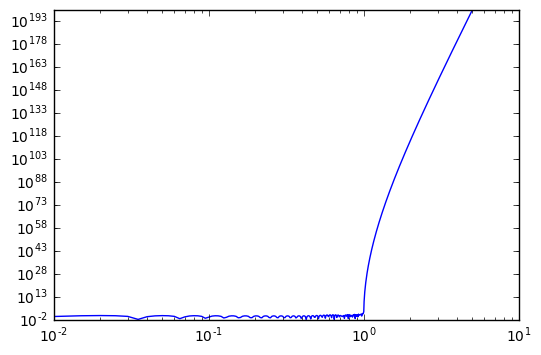

In [7]:

step = np.linspace(0.01, 5, 1000)
err = np.zeros(1000)
for i in range(1000):
    h = step[i]
    t = 0
    for j in range(50):
        euler(xn)
        t = t + i
    #print(h) 
    err[i] = (xn[0] - np.sin(2 * t)) ** 2 + (xn[1] - 2 * np.cos(2 * t)) ** 2
    xn[0] = 0
    xn[1] = 2
    
plt.loglog(step, err)
plt.show()



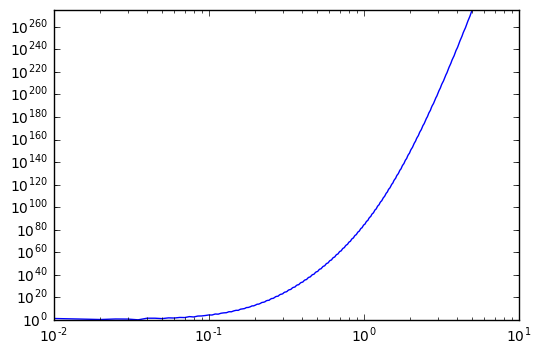

In [8]:
#RK4
step = np.linspace(0.01, 5, 1000)
err = np.zeros(1000)
for i in range(1000):
    h = step[i]
    t = 0
    for j in range(50):
        rk4(xn)
        t = t + i
    #print(h) 
    err[i] = (xn[0] - np.sin(2 * t)) ** 2 + (xn[1] - 2 * np.cos(2 * t)) ** 2
    xn[0] = 0
    xn[1] = 2
    
plt.loglog(step, err)
plt.show()

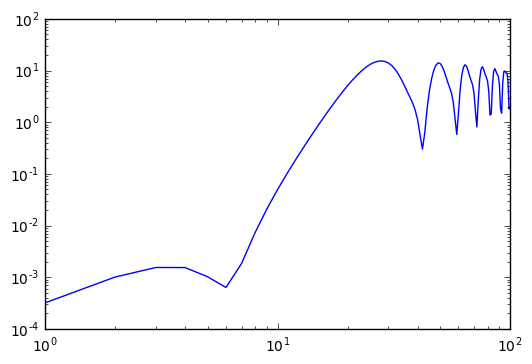

In [9]:
#ASRK5 Error vs Iteration Plot
fgd = 100
itr = np.linspace(1, fgd, fgd)
err = np.zeros(fgd)
g = 0
h = 0.003
for i in range(fgd):
    g = asrk5(eps, y, xn) * (i + 1) + g
    err[i] = (xn[0] - np.sin(2 * g)) ** 2 + (xn[1] - 2 * np.cos(2 * g)) ** 2

plt.loglog(itr, err)
plt.show()    